#Libreries import

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
   

#Dataset import

In [3]:
!pip install -U -q PyDrive

In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
drive.CreateFile({'id':'1i1ZosMDaZOOP4z1Ojv0wBdSzf4k7Zfhl'}).GetContentFile('dataset_final_4.0_no_ohe.csv') # versione del dataset pre-ohe
df = pd.read_csv("dataset_final_4.0_no_ohe.csv").drop('Unnamed: 0',axis=1)

In [7]:
audio_features = ['valence','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo']
categorical_features = ['explicit','key','mode']

#Bilanciamento dataset

In [8]:
# bilanciamento dataset

def undersample(df, label, col=None):
  hits = df[df[label] == 1]
  non_hits = df[df[label] == 0]

  if(col != None):

    non_hits_sampled_array = []

    for a in non_hits[col].unique():
      n = hits[hits[col] == a].id.count()
      non_hits_sampled_array.append(non_hits[non_hits[col] == a].sample(n))

    non_hits_sampled = pd.concat(non_hits_sampled_array)

  else:
    non_hits_sampled = df[df[label] == 0].sample(hits.shape[0])

  return pd.concat([hits,non_hits_sampled])

# eseguo sampling in modo da avere classi bilanciate per ogni decennio --> undersampling su non-hit

balanced_df = undersample(df, label='hit', col='year_YYYY')

#Audio feature distribution

##Audio features

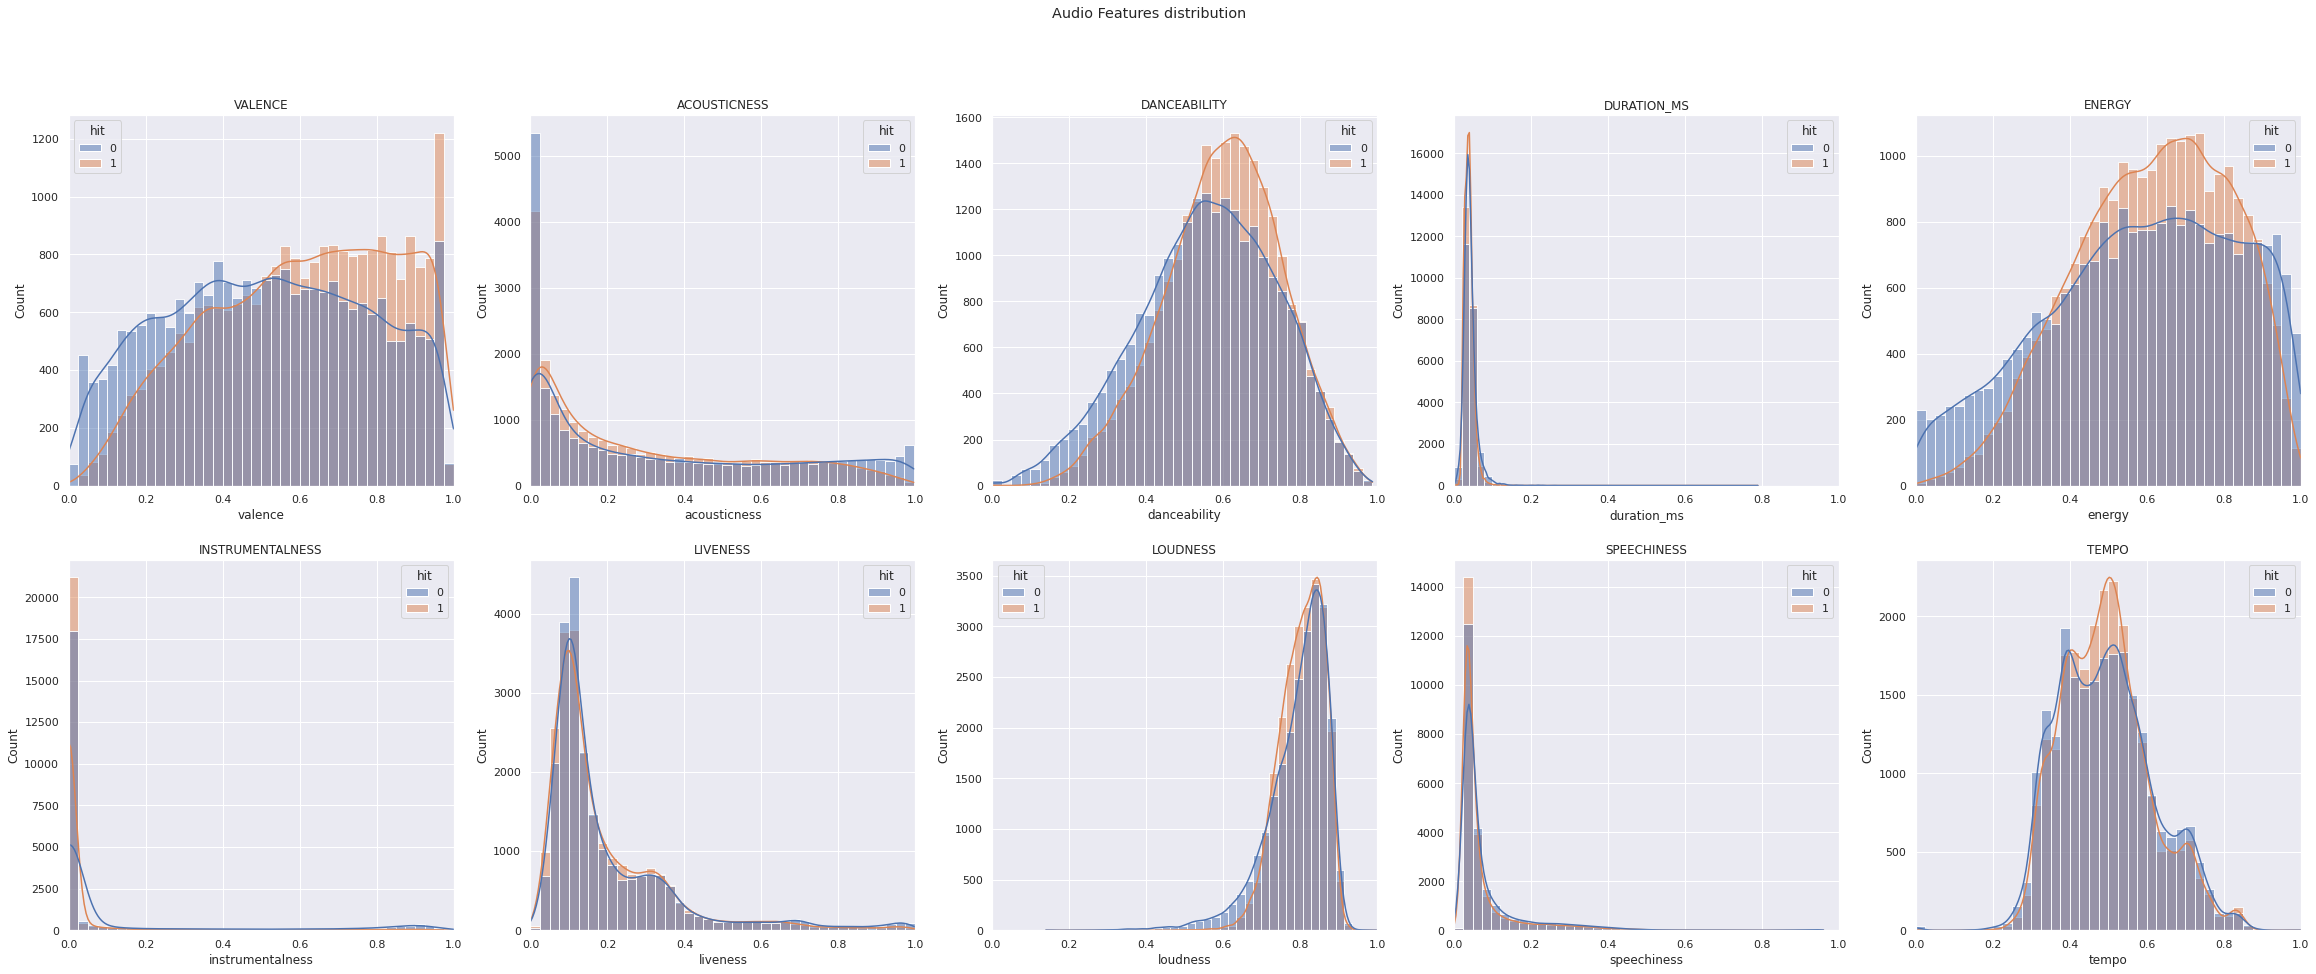

In [41]:
# PLOT AUDIO FEATURES DISTRIBUTION

sns.set()
fig, axes = plt.subplots(2,5, figsize=(40,15))
fig.suptitle('Audio Features distribution')

for i,feature in enumerate(audio_features):
  if(i<5):
    k = 0
  else:
    k = 1
    i -= 5

  sns.histplot(balanced_df, x=feature, hue='hit', ax=axes[k][i], kde=True, bins=40)   # oppure kind='kde' --> togliere bins
  axes[k][i].set_title(feature.upper())
  axes[k][i].set(xlim=(0,1))

###Singoli grafici x export

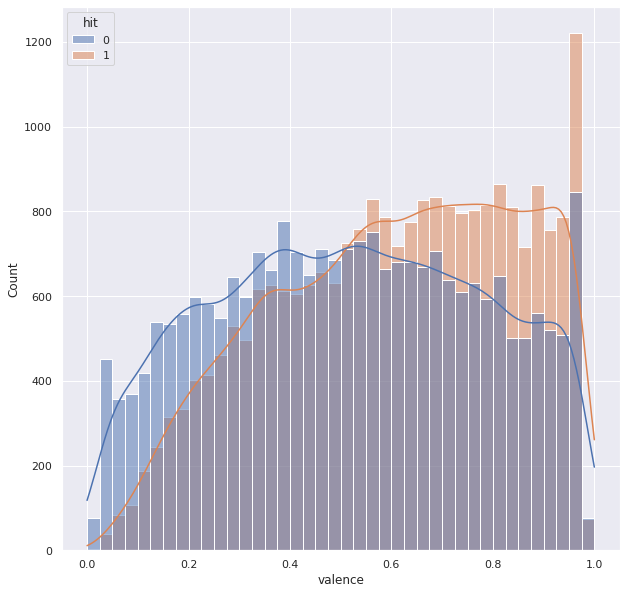

In [46]:
sns.set()
fig.suptitle('Audio Features distribution')
sns.set(rc={'figure.figsize':(10,10)})

sns.histplot(balanced_df, x='valence', hue='hit', kde=True, bins=40)

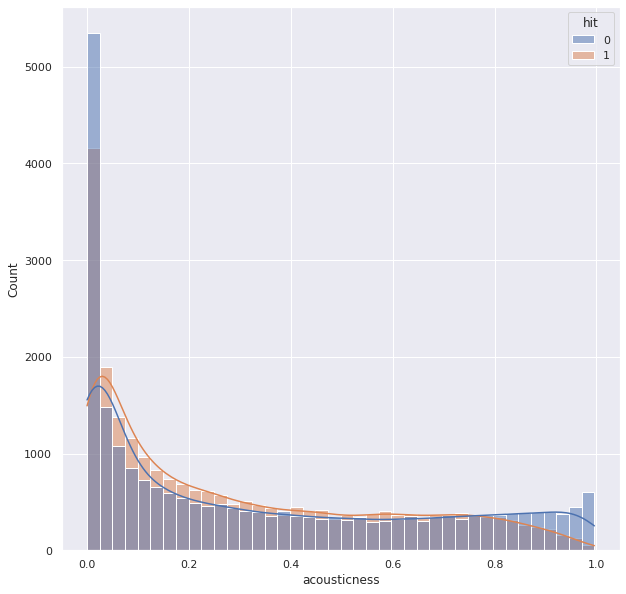

In [47]:
sns.set()
fig.suptitle('Audio Features distribution')
sns.set(rc={'figure.figsize':(10,10)})

sns.histplot(balanced_df, x='acousticness', hue='hit', kde=True, bins=40)

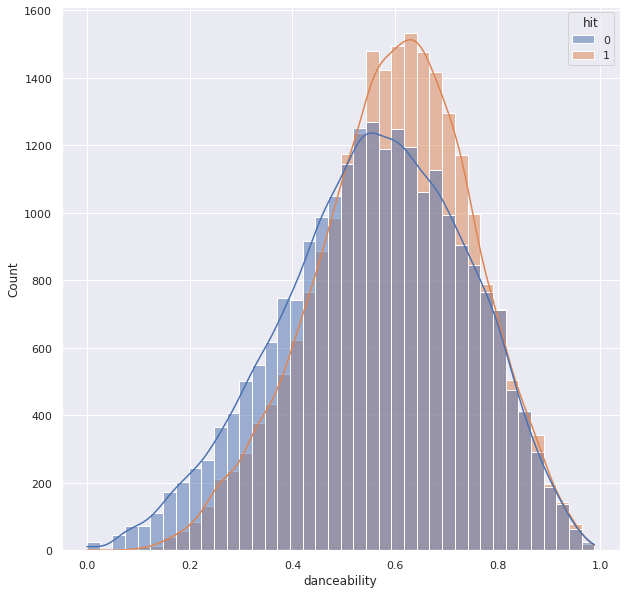

In [48]:
sns.set()
fig.suptitle('Audio Features distribution')
sns.set(rc={'figure.figsize':(10,10)})

sns.histplot(balanced_df, x='danceability', hue='hit', kde=True, bins=40)

[(0.0, 1.0)]

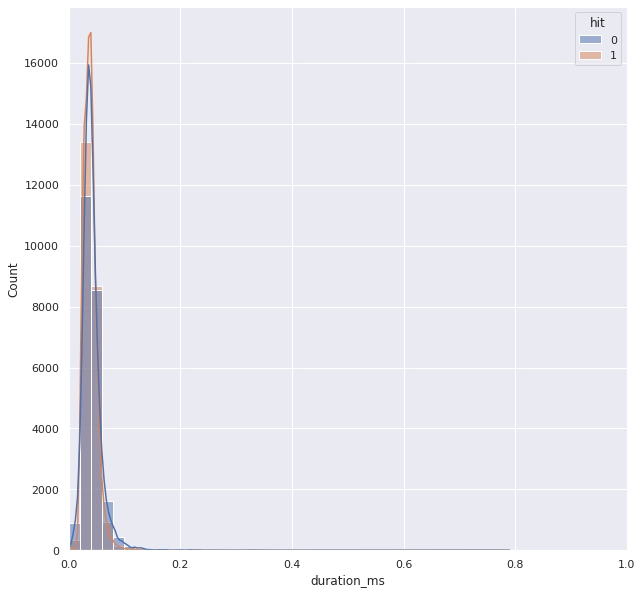

In [56]:
sns.set()
fig.suptitle('Audio Features distribution')
sns.set(rc={'figure.figsize':(10,10)})

sns.histplot(balanced_df, x='duration_ms', hue='hit', kde=True, bins=40).set(xlim=(0,1))

[(0.0, 1.0)]

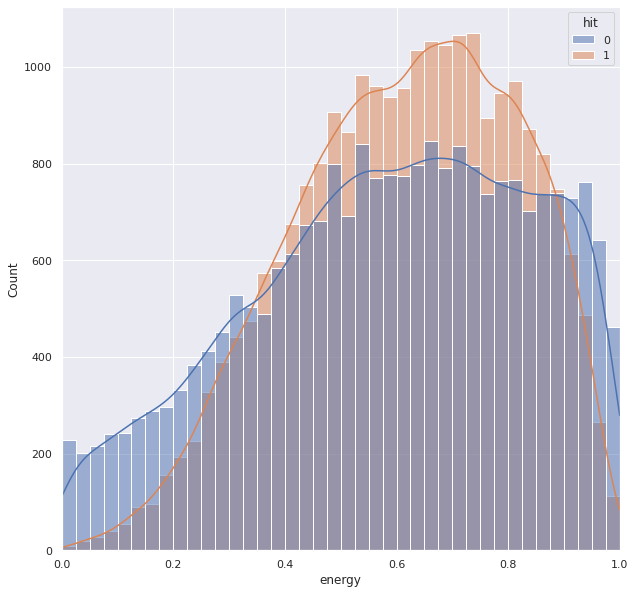

In [57]:
sns.set()
fig.suptitle('Audio Features distribution')
sns.set(rc={'figure.figsize':(10,10)})

sns.histplot(balanced_df, x='energy', hue='hit', kde=True, bins=40).set(xlim=(0,1))

[(0.0, 1.0)]

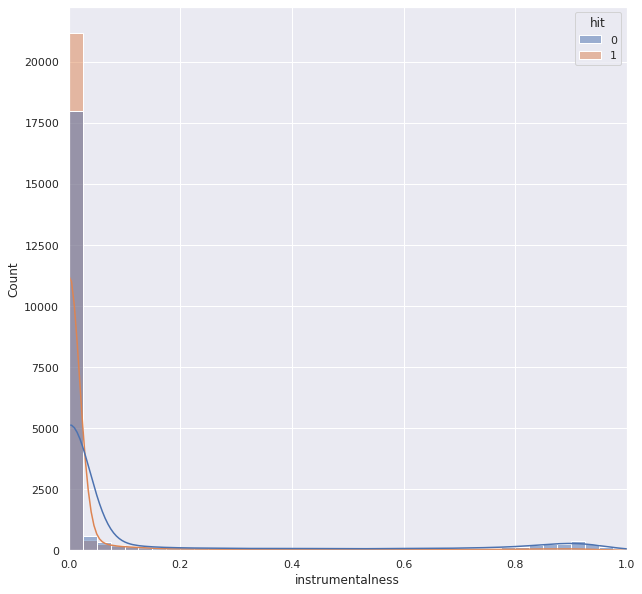

In [58]:
sns.set()
fig.suptitle('Audio Features distribution')
sns.set(rc={'figure.figsize':(10,10)})

sns.histplot(balanced_df, x='instrumentalness', hue='hit', kde=True, bins=40).set(xlim=(0,1))

[(0.0, 1.0)]

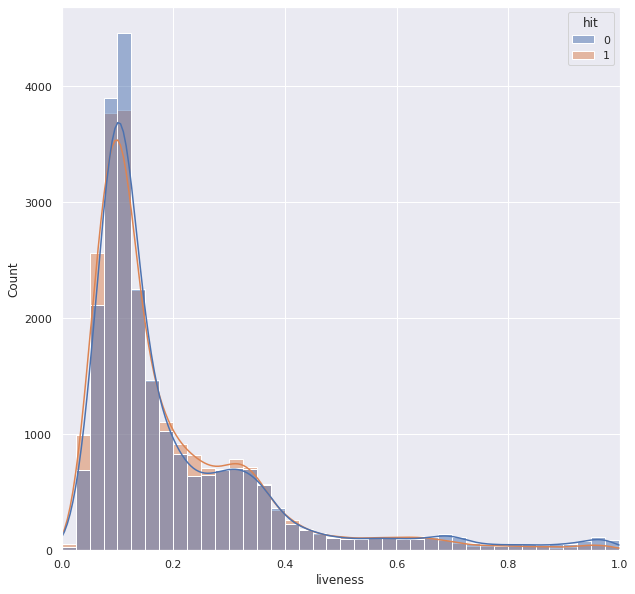

In [59]:
sns.set()
fig.suptitle('Audio Features distribution')
sns.set(rc={'figure.figsize':(10,10)})

sns.histplot(balanced_df, x='liveness', hue='hit', kde=True, bins=40).set(xlim=(0,1))

[(0.0, 1.0)]

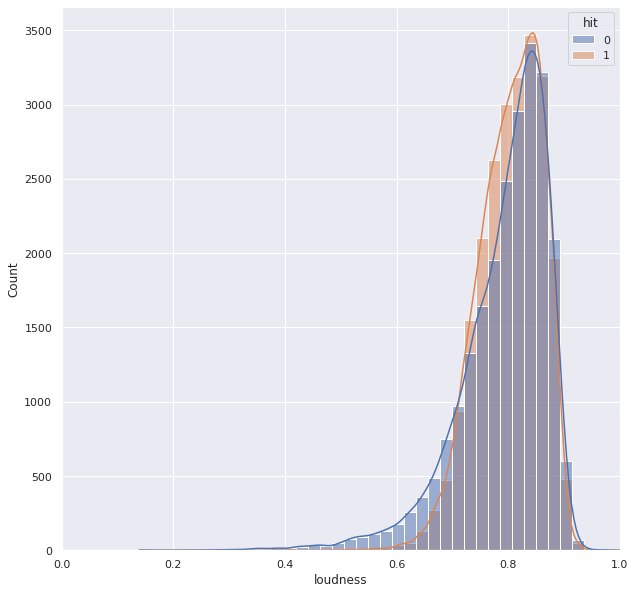

In [60]:
sns.set()
fig.suptitle('Audio Features distribution')
sns.set(rc={'figure.figsize':(10,10)})

sns.histplot(balanced_df, x='loudness', hue='hit', kde=True, bins=40).set(xlim=(0,1))

[(0.0, 1.0)]

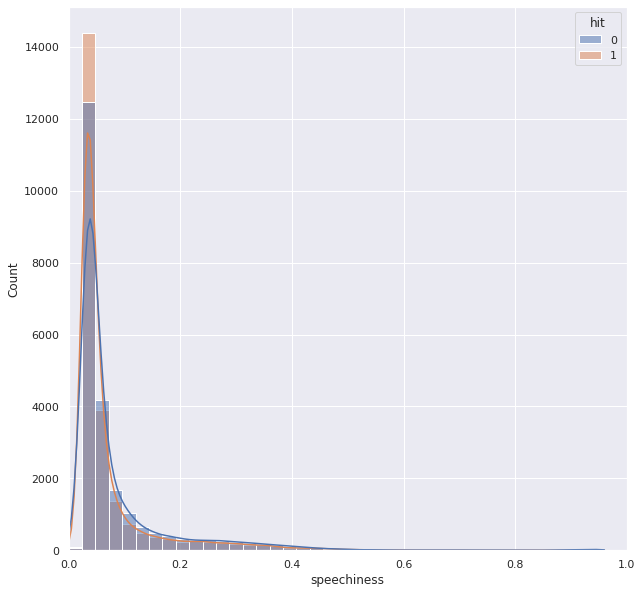

In [61]:
sns.set()
fig.suptitle('Audio Features distribution')
sns.set(rc={'figure.figsize':(10,10)})

sns.histplot(balanced_df, x='speechiness', hue='hit', kde=True, bins=40).set(xlim=(0,1))

[(0.0, 1.0)]

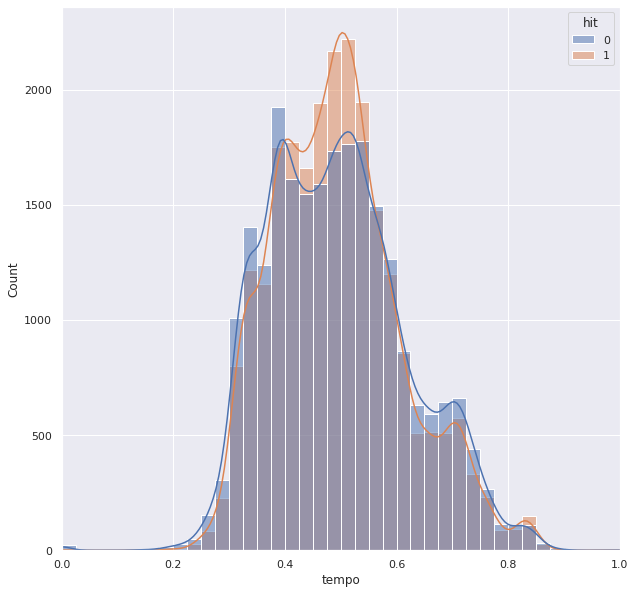

In [62]:
sns.set()
fig.suptitle('Audio Features distribution')
sns.set(rc={'figure.figsize':(10,10)})

sns.histplot(balanced_df, x='tempo', hue='hit', kde=True, bins=40).set(xlim=(0,1))

##Categorical features

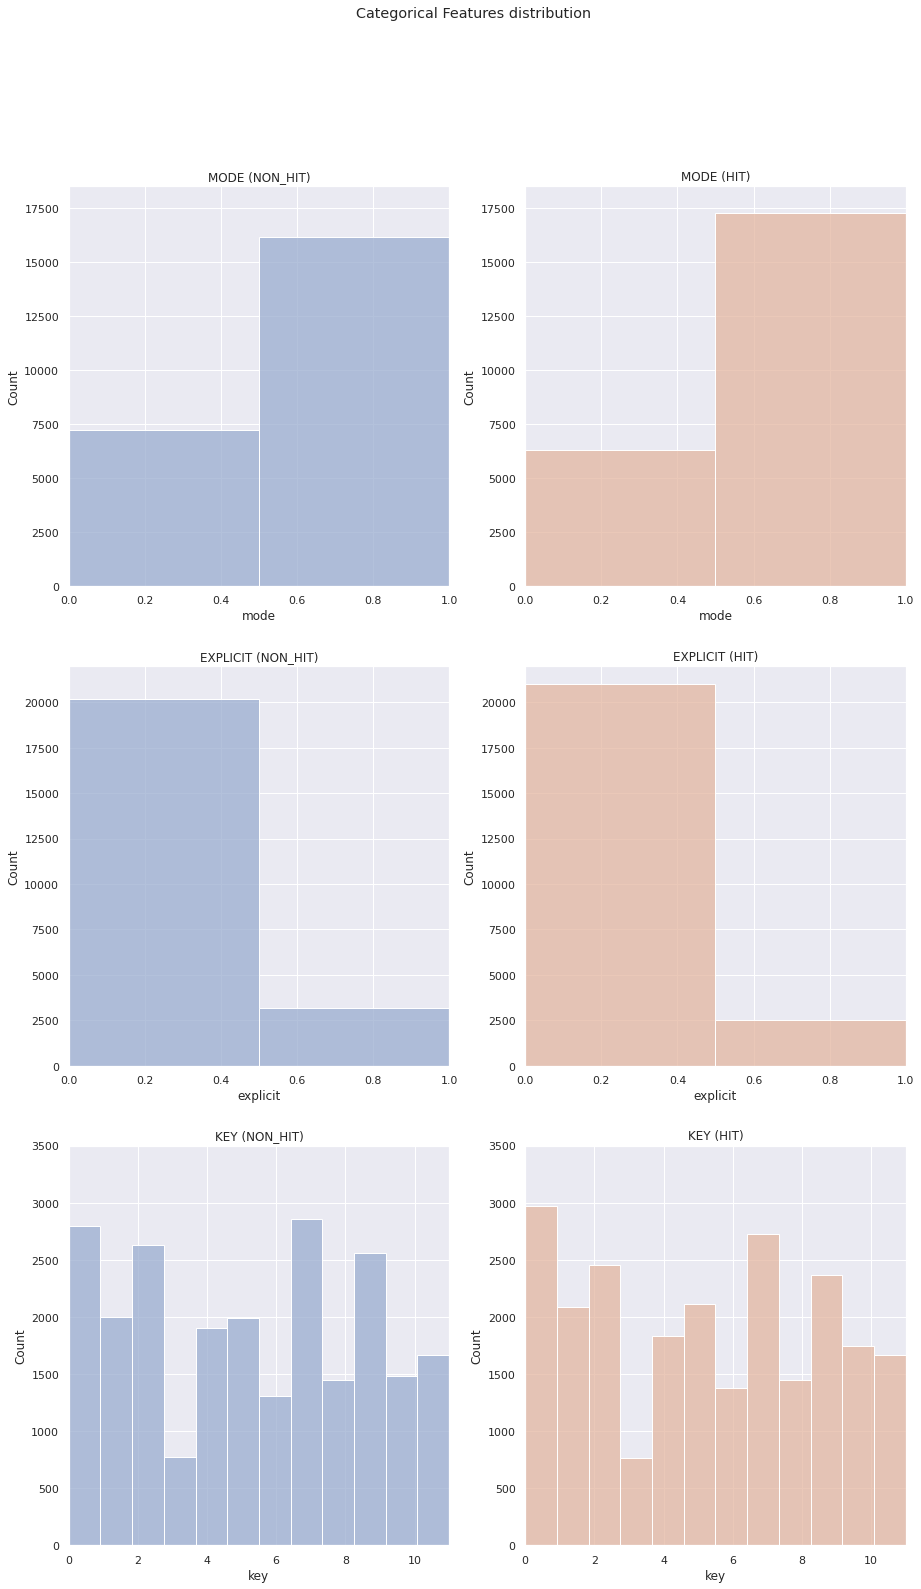

In [37]:
# PLOT CATEGORICAL FEATURES DISTRIBUTION

sns.set()
fig, axes = plt.subplots(3,2, figsize=(15,25))
fig.suptitle('Categorical Features distribution')

non_hits = balanced_df[balanced_df.hit == 0]
hits = balanced_df[balanced_df.hit == 1]

for i, sub_df in enumerate([non_hits,hits]):

  if(i == 0):
    label = 'non_hit'
    color = '#9aadd0'
  else:
    label = 'hit'
    color = '#e3b6a1'

  # mode
  sns.histplot(sub_df, x='mode', ax=axes[0][i], bins=2, color=color)
  axes[0][i].set_title(('mode (' + label + ')').upper())
  axes[0][i].set(xlim=(0,1))
  axes[0][i].set(ylim=(0,18500))


  # explicit
  sns.histplot(sub_df, x='explicit', ax=axes[1][i], bins=2, color=color)
  axes[1][i].set_title(('explicit (' + label + ')').upper())
  axes[1][i].set(xlim=(0,1))
  axes[1][i].set(ylim=(0,22000))


  # key
  sns.histplot(sub_df, x='key', ax=axes[2][i], bins=12, color=color)
  axes[2][i].set_title(('key (' + label + ')').upper())
  axes[2][i].set(xlim=(0,11))
  axes[2][i].set(ylim=(0,3500))


#Matrice di correlazione

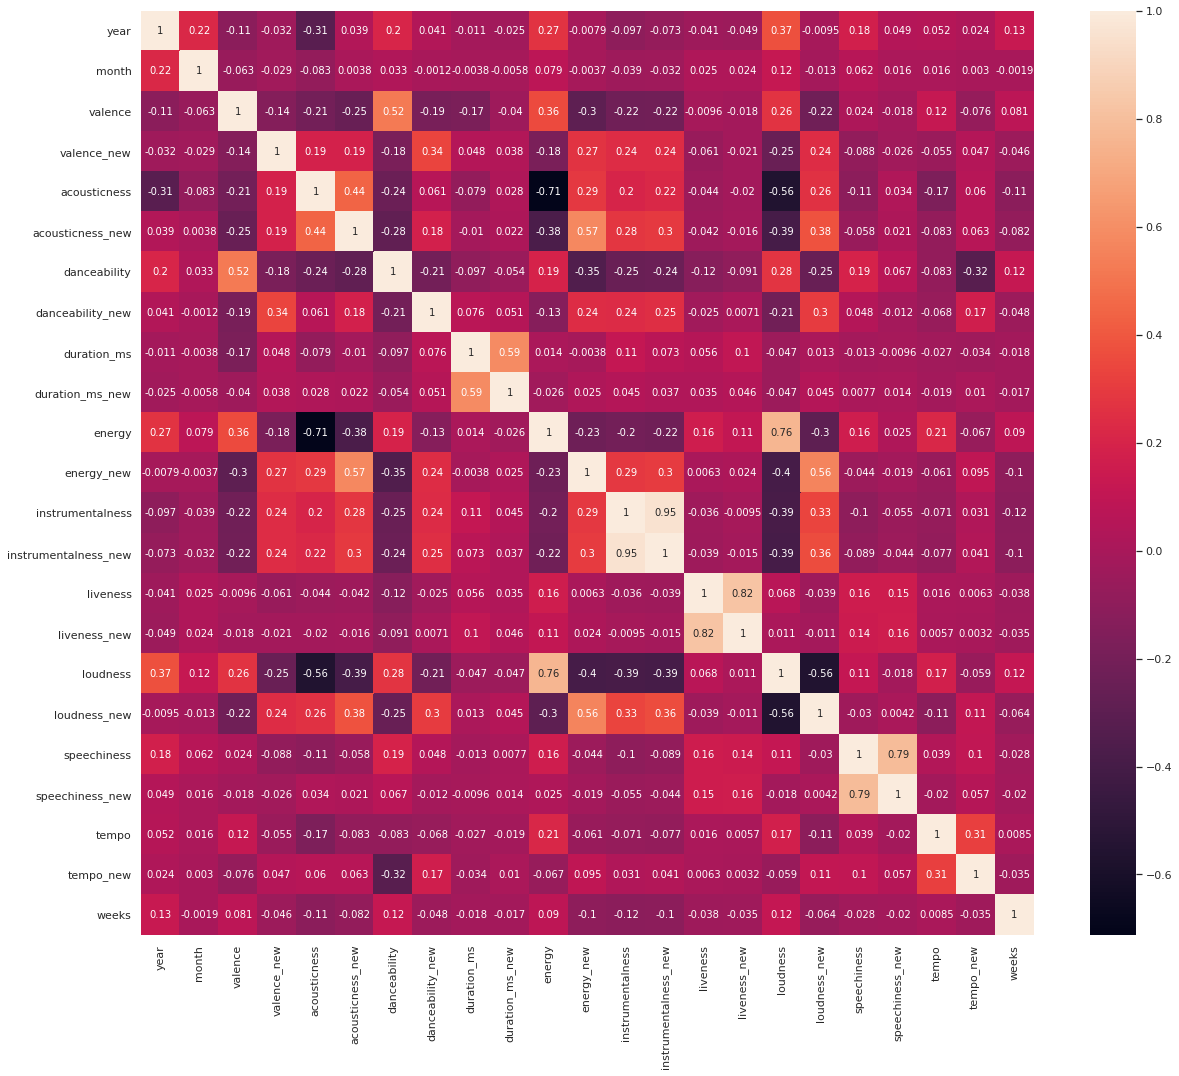

In [ ]:
# matrice di correlazione

df_to_plot = df[['year','month','valence','valence_new','acousticness','acousticness_new','danceability','danceability_new','duration_ms','duration_ms_new','energy','energy_new','instrumentalness',
                 'instrumentalness_new','liveness','liveness_new','loudness','loudness_new','speechiness','speechiness_new','tempo','tempo_new','weeks']]

sns.set(rc={'figure.figsize':(20,17)})
sns.heatmap(df_to_plot.corr(),xticklabels=df_to_plot.columns,yticklabels=df_to_plot.columns,annot=True, annot_kws={'size':10})

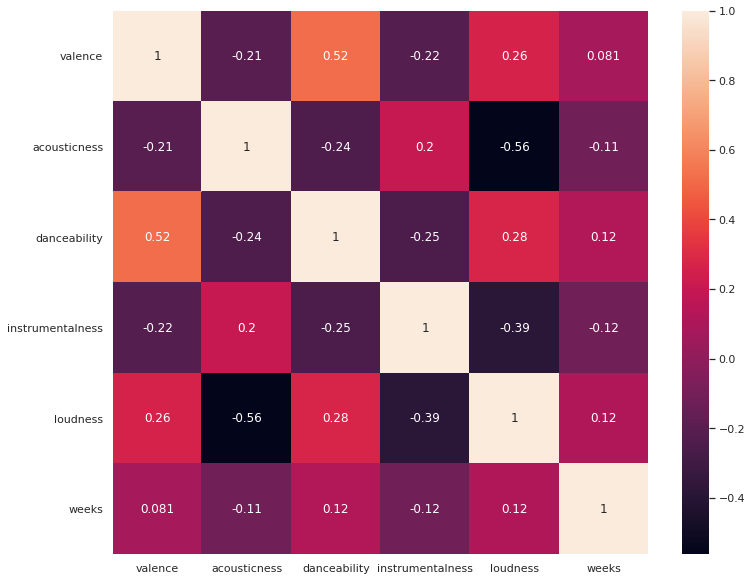

In [ ]:
df_to_plot = df[['valence','acousticness','danceability','instrumentalness','loudness','weeks']]

sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(df_to_plot.corr(),xticklabels=df_to_plot.columns,yticklabels=df_to_plot.columns,annot=True)

#T-test

In [12]:
# T TEST

for x in audio_features:
  p = stats.ttest_ind(hits[x],non_hits[x])[1]
  
  if(p < 0.05):
    result = 'diverse'
  else:
    result = 'uguali'

  print("%s: p=%f --> le classi sono %s" % (x, p, result))

# print("\n1 = le due classi sono diverse, 0 = le due classi sono uguali")

valence: p=0.000000 --> le classi sono diverse
acousticness: p=0.000000 --> le classi sono diverse
danceability: p=0.000000 --> le classi sono diverse
duration_ms: p=0.000000 --> le classi sono diverse
energy: p=0.000000 --> le classi sono diverse
instrumentalness: p=0.000000 --> le classi sono diverse
liveness: p=0.000000 --> le classi sono diverse
loudness: p=0.000000 --> le classi sono diverse
speechiness: p=0.000000 --> le classi sono diverse
tempo: p=0.512112 --> le classi sono uguali


#Boxplot

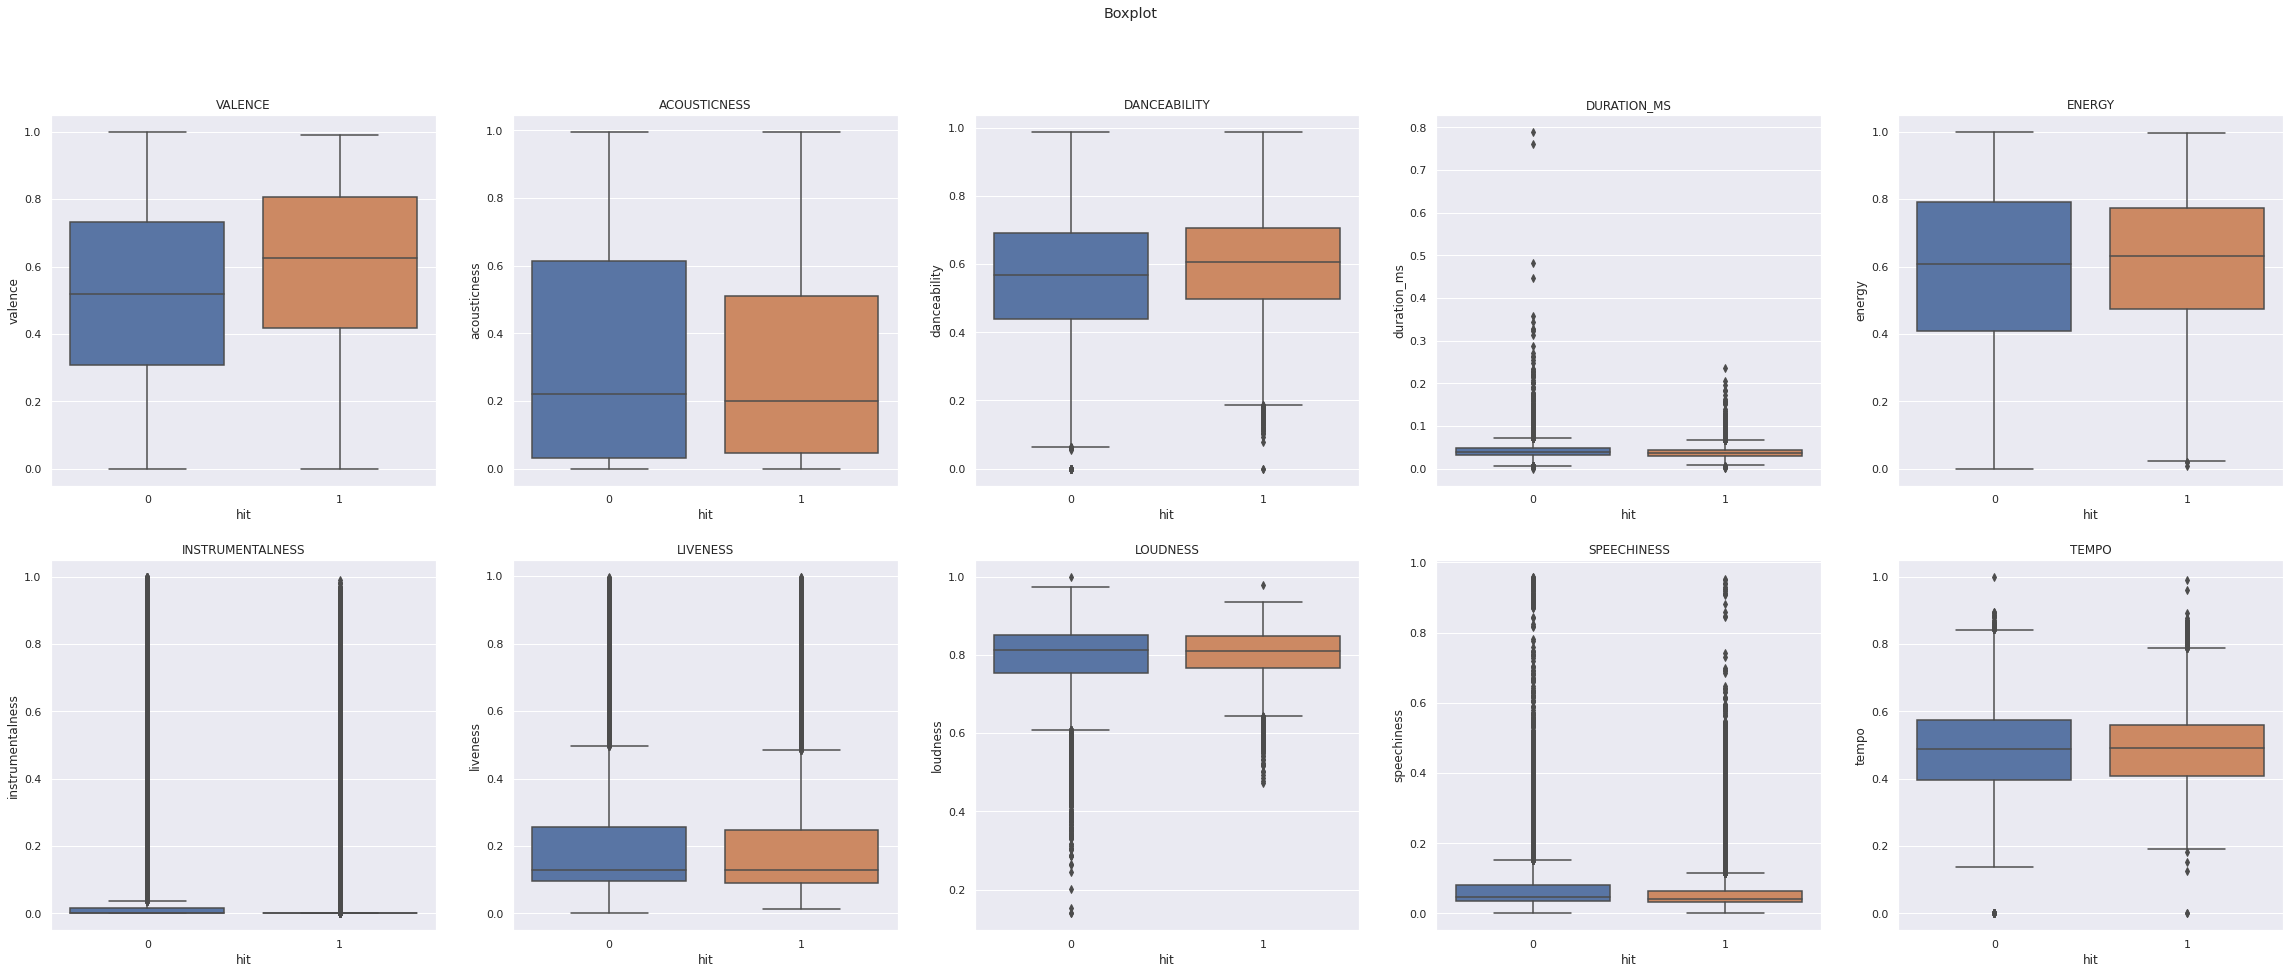

In [13]:
sns.set()
fig, axes = plt.subplots(2,5, figsize=(40,15))
fig.suptitle('Boxplot')

for i,feature in enumerate(audio_features):
  if(i<5):
    k = 0
  else:
    k = 1
    i -= 5

  sns.boxplot(x=balanced_df['hit'], y=balanced_df[feature], ax=axes[k][i])
  axes[k][i].set_title(feature.upper())

#Features evolution

In [15]:
#grouped_df = df.groupby(['year_YYYY']).mean()

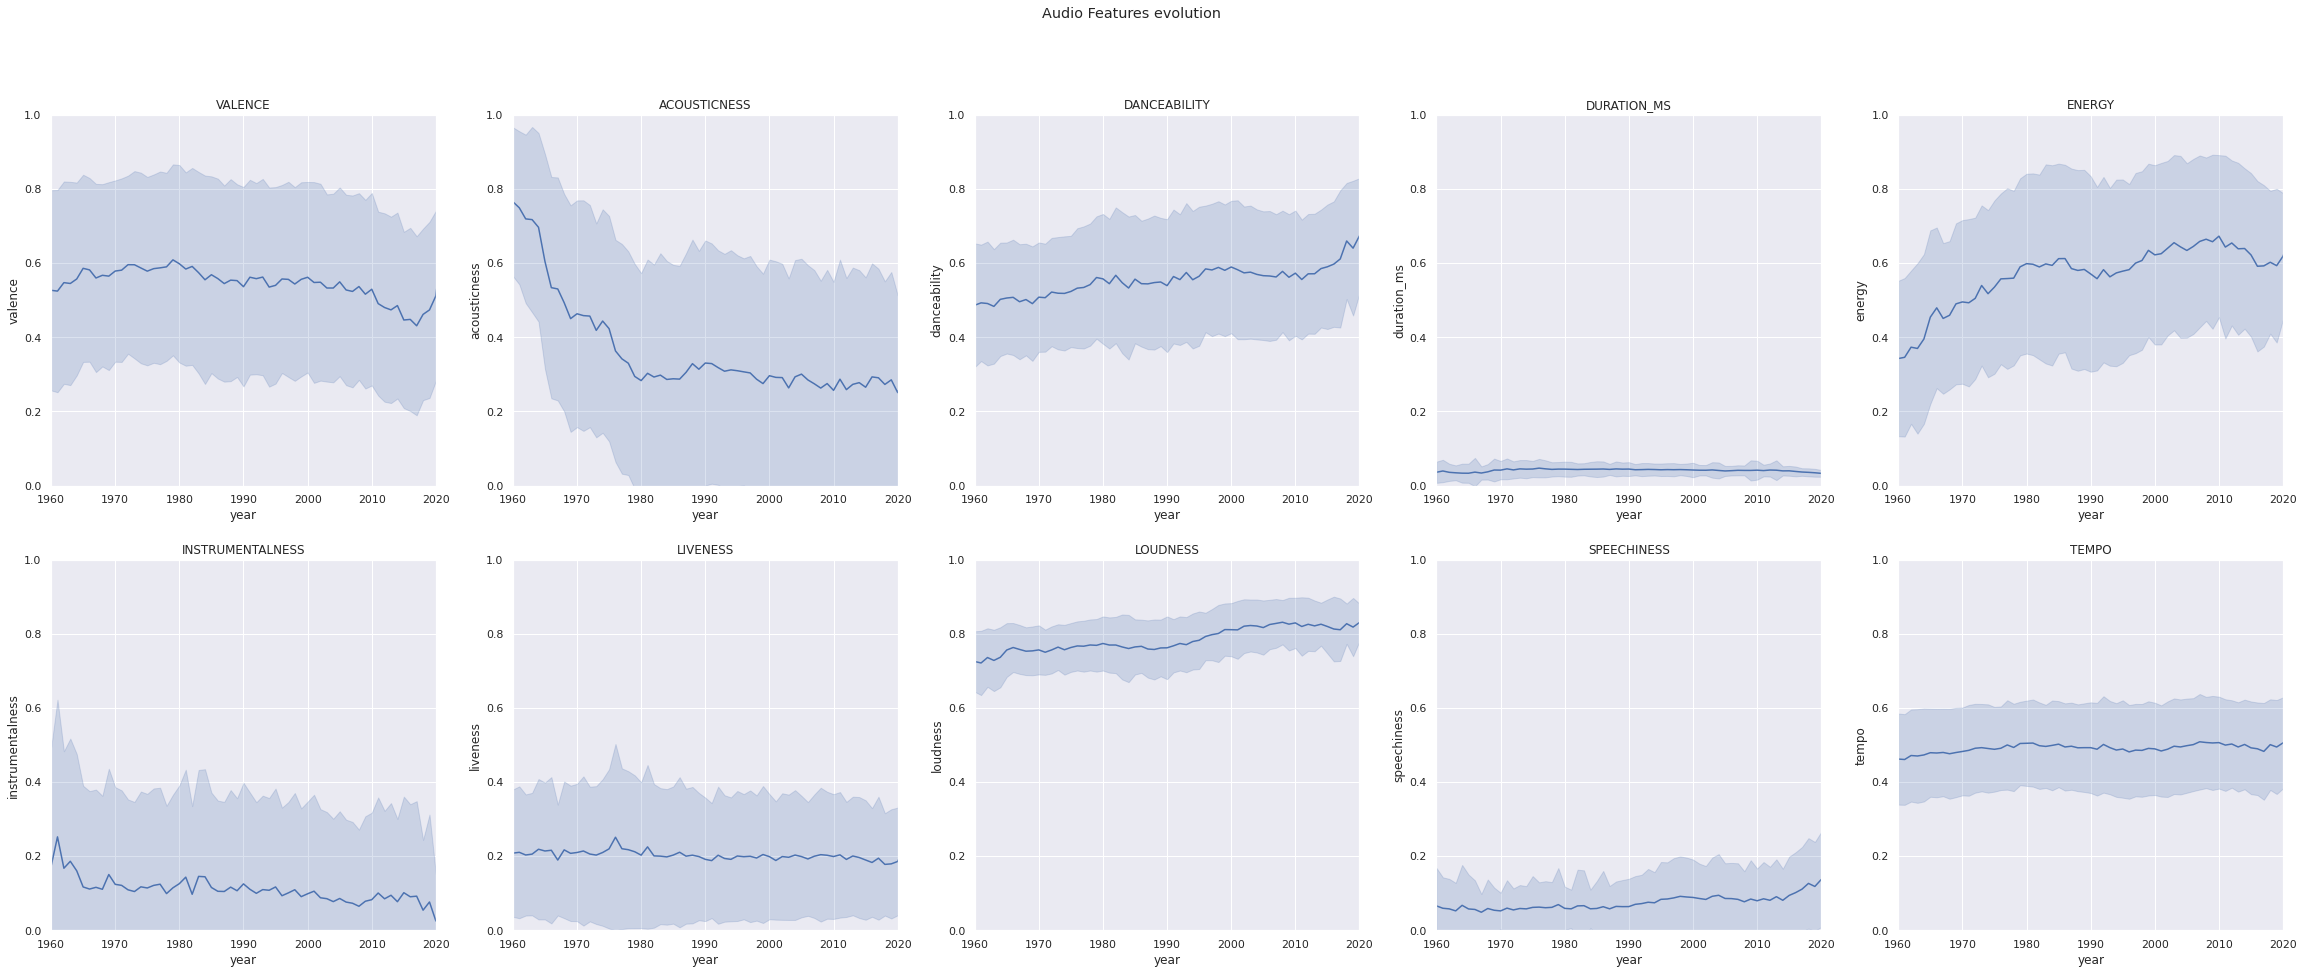

In [38]:
sns.set()
fig, axes = plt.subplots(2,5, figsize=(40,15))
fig.suptitle('Audio Features evolution')

x = df.index.to_numpy()

for i,feature in enumerate(audio_features):
  if(i<5):
    k = 0
  else:
    k = 1
    i -= 5

  y = df[feature].to_numpy()

  sns.lineplot(data=df, y=feature, x='year_YYYY', ci='sd', ax=axes[k][i]) # ci=None

  axes[k][i].set_title(feature.upper())
  axes[k][i].set(xlim=(1960,2020))
  axes[k][i].set(ylim=(0,1))
  axes[k][i].set(xlabel='year')

In [10]:
#grouped_df_hit = df[df.hit == 1].groupby(['year_YYYY']).mean()
#grouped_df_non_hit = df[df.hit == 0].groupby(['year_YYYY']).mean()

df_hit = df[df.hit == 1]
df_non_hit = df[df.hit == 0]

In [ ]:
#concat_grouped_df = pd.concat((grouped_df_hit,grouped_df_non_hit)).sort_values('year_YYYY')
#concat_grouped_df.hit = concat_grouped_df.hit.apply(int)

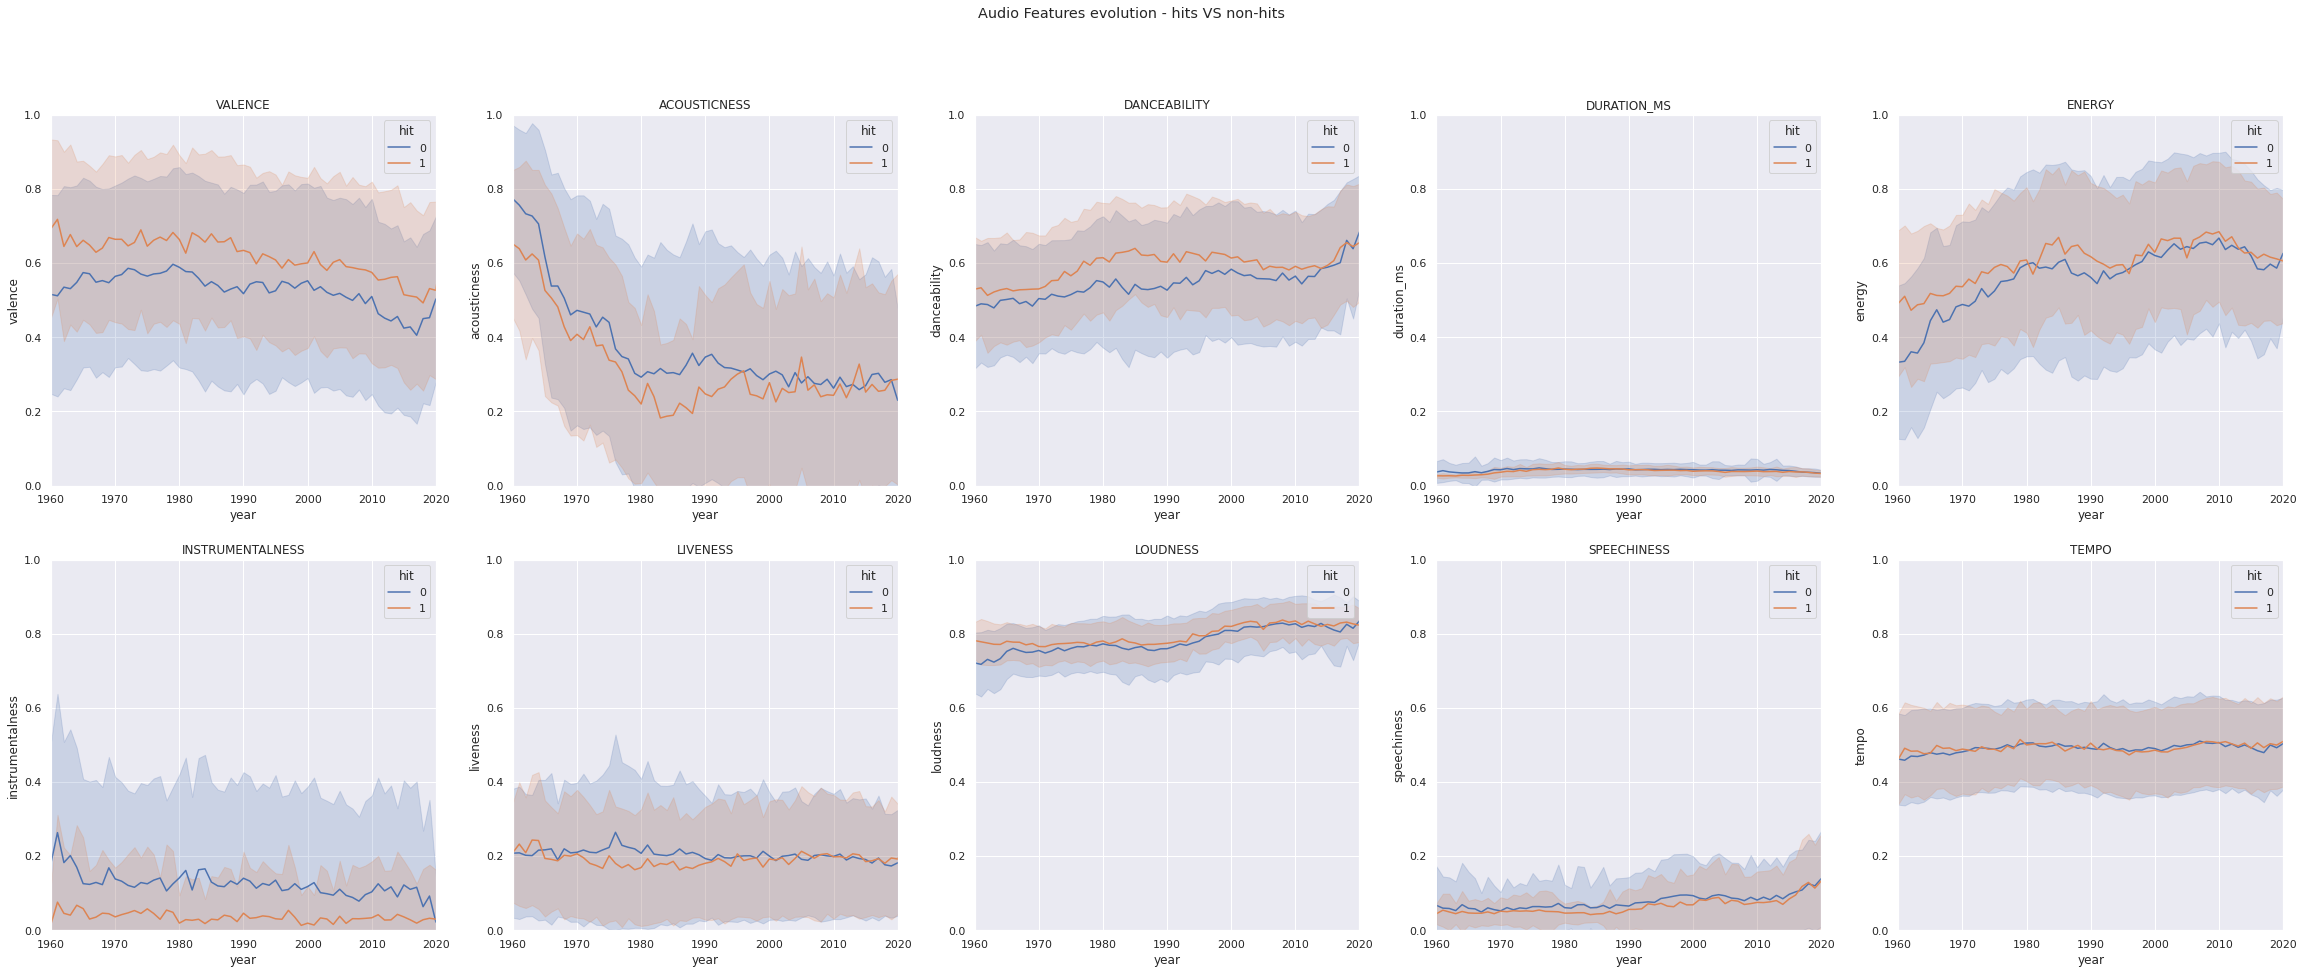

In [39]:
sns.set()
fig, axes = plt.subplots(2,5, figsize=(40,15))
fig.suptitle('Audio Features evolution - hits VS non-hits')

x = df_hit.index.to_numpy()

for i,feature in enumerate(audio_features):
  if(i<5):
    k = 0
  else:
    k = 1
    i -= 5

  y = df_hit[feature].to_numpy()

  sns.lineplot(data=df, y=feature, x='year_YYYY', ax=axes[k][i], hue='hit', ci='sd')  # ci=None
  axes[k][i].set_title(feature.upper())
  axes[k][i].set(xlim=(1960,2020))
  axes[k][i].set(ylim=(0,1))
  axes[k][i].set(xlabel='year')

##Grafici singoli x export

(1960.0, 2020.0)

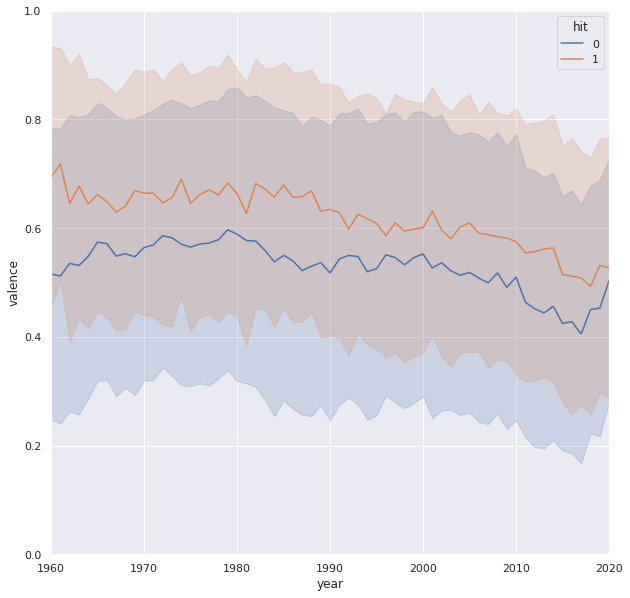

In [25]:
feature = 'valence'

sns.set()
fig.suptitle('Audio Features evolution')
sns.set(rc={'figure.figsize':(10,10)})

x = df_hit.index.to_numpy()
y = df_hit[feature].to_numpy()

sns.lineplot(data=df, y=feature, x='year_YYYY', hue='hit', ci='sd')
plt.xlabel('year')
plt.ylim(0,1)
plt.xlim(1960,2020)

(1960.0, 2020.0)

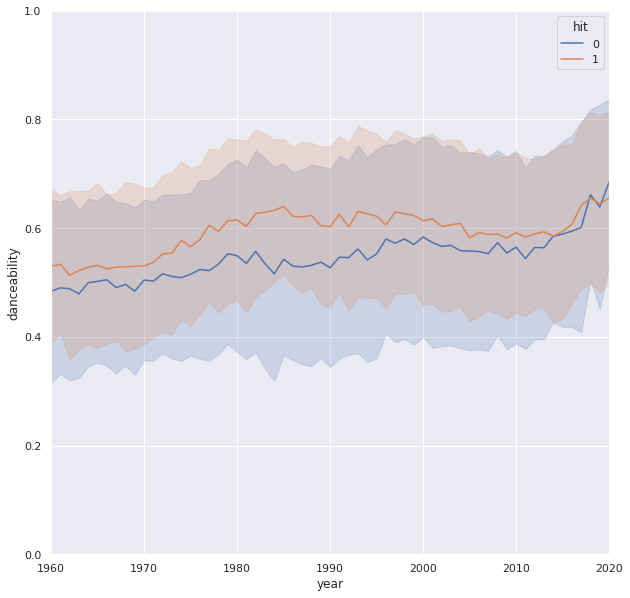

In [26]:
feature = 'danceability'

sns.set()
fig.suptitle('Audio Features evolution')
sns.set(rc={'figure.figsize':(10,10)})

x = df_hit.index.to_numpy()
y = df_hit[feature].to_numpy()

sns.lineplot(data=df, y=feature, x='year_YYYY', hue='hit', ci='sd')
plt.xlabel('year')
plt.ylim(0,1)
plt.xlim(1960,2020)

(1960.0, 2020.0)

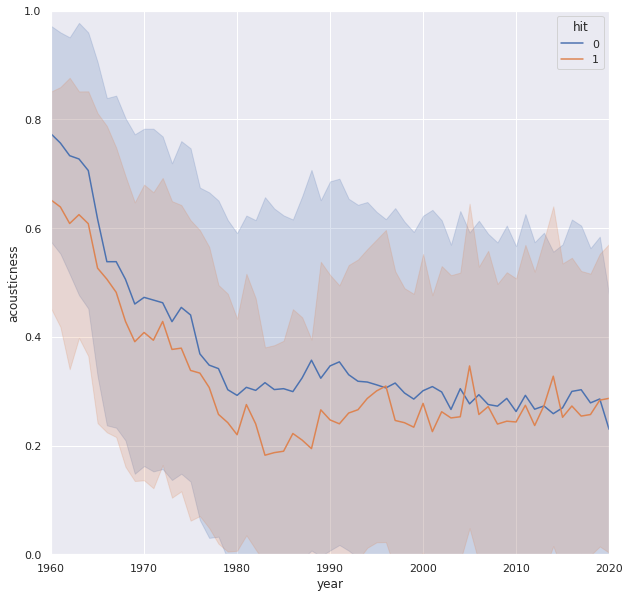

In [27]:
feature = 'acousticness'

sns.set()
fig.suptitle('Audio Features evolution')
sns.set(rc={'figure.figsize':(10,10)})

x = df_hit.index.to_numpy()
y = df_hit[feature].to_numpy()

sns.lineplot(data=df, y=feature, x='year_YYYY', hue='hit', ci='sd')
plt.xlabel('year')
plt.ylim(0,1)
plt.xlim(1960,2020)

(1960.0, 2020.0)

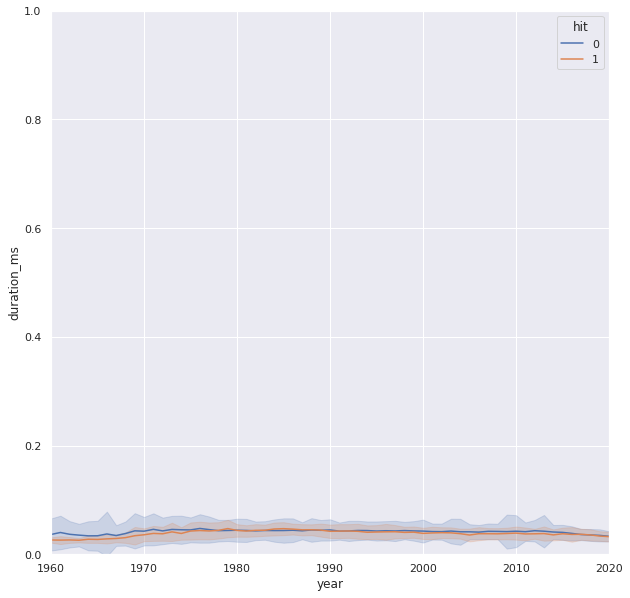

In [28]:
feature = 'duration_ms'

sns.set()
fig.suptitle('Audio Features evolution')
sns.set(rc={'figure.figsize':(10,10)})

x = df_hit.index.to_numpy()
y = df_hit[feature].to_numpy()

sns.lineplot(data=df, y=feature, x='year_YYYY', hue='hit', ci='sd')
plt.xlabel('year')
plt.ylim(0,1)
plt.xlim(1960,2020)

(1960.0, 2020.0)

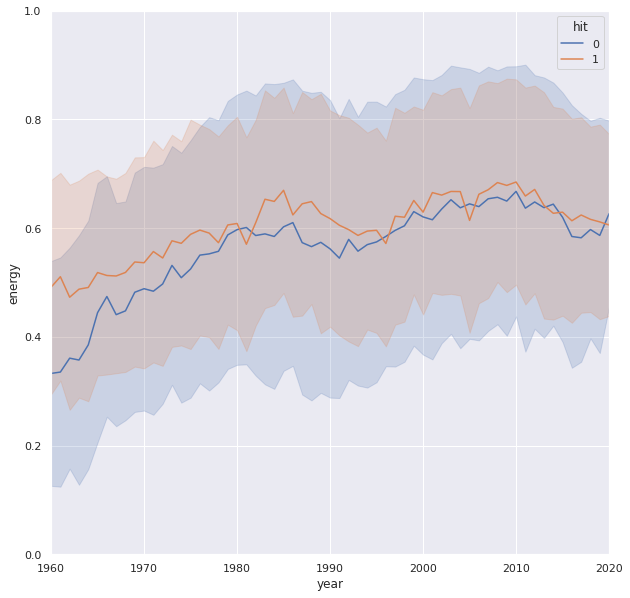

In [29]:
feature = 'energy'

sns.set()
fig.suptitle('Audio Features evolution')
sns.set(rc={'figure.figsize':(10,10)})

x = df_hit.index.to_numpy()
y = df_hit[feature].to_numpy()

sns.lineplot(data=df, y=feature, x='year_YYYY', hue='hit', ci='sd')
plt.xlabel('year')
plt.ylim(0,1)
plt.xlim(1960,2020)

(1960.0, 2020.0)

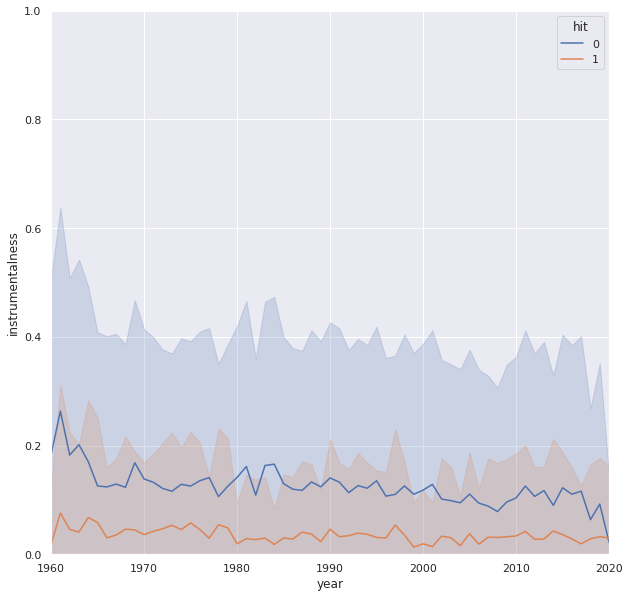

In [30]:
feature = 'instrumentalness'

sns.set()
fig.suptitle('Audio Features evolution')
sns.set(rc={'figure.figsize':(10,10)})

x = df_hit.index.to_numpy()
y = df_hit[feature].to_numpy()

sns.lineplot(data=df, y=feature, x='year_YYYY', hue='hit', ci='sd')
plt.xlabel('year')
plt.ylim(0,1)
plt.xlim(1960,2020)

(1960.0, 2020.0)

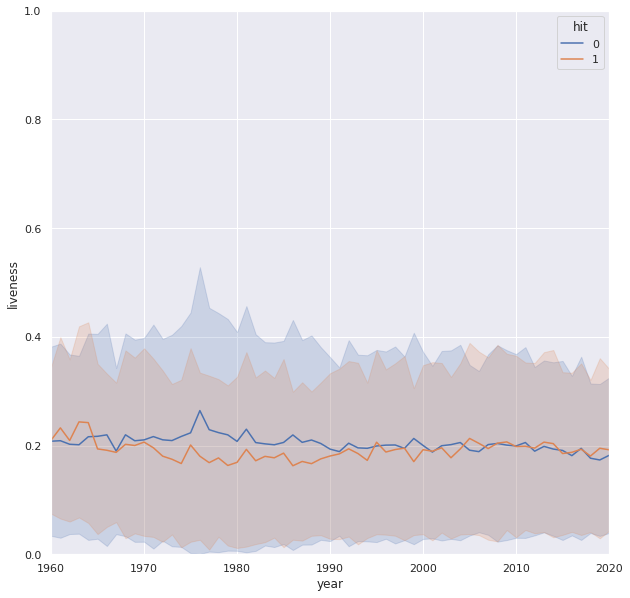

In [31]:
feature = 'liveness'

sns.set()
fig.suptitle('Audio Features evolution')
sns.set(rc={'figure.figsize':(10,10)})

x = df_hit.index.to_numpy()
y = df_hit[feature].to_numpy()

sns.lineplot(data=df, y=feature, x='year_YYYY', hue='hit', ci='sd')
plt.xlabel('year')
plt.ylim(0,1)
plt.xlim(1960,2020)

(1960.0, 2020.0)

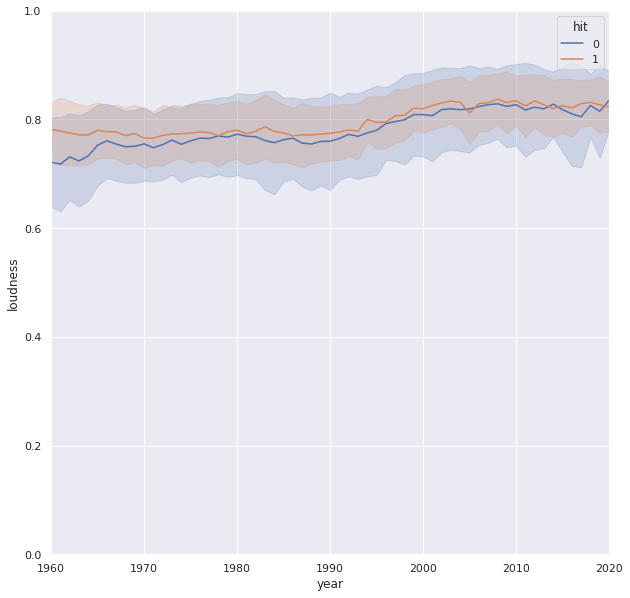

In [32]:
feature = 'loudness'

sns.set()
fig.suptitle('Audio Features evolution')
sns.set(rc={'figure.figsize':(10,10)})

x = df_hit.index.to_numpy()
y = df_hit[feature].to_numpy()

sns.lineplot(data=df, y=feature, x='year_YYYY', hue='hit', ci='sd')
plt.xlabel('year')
plt.ylim(0,1)
plt.xlim(1960,2020)

(1960.0, 2020.0)

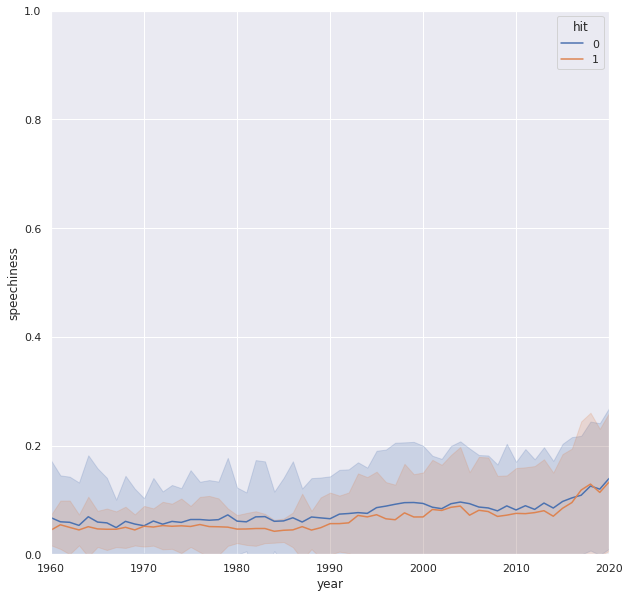

In [33]:
feature = 'speechiness'

sns.set()
fig.suptitle('Audio Features evolution')
sns.set(rc={'figure.figsize':(10,10)})

x = df_hit.index.to_numpy()
y = df_hit[feature].to_numpy()

sns.lineplot(data=df, y=feature, x='year_YYYY', hue='hit', ci='sd')
plt.xlabel('year')
plt.ylim(0,1)
plt.xlim(1960,2020)

(1960.0, 2020.0)

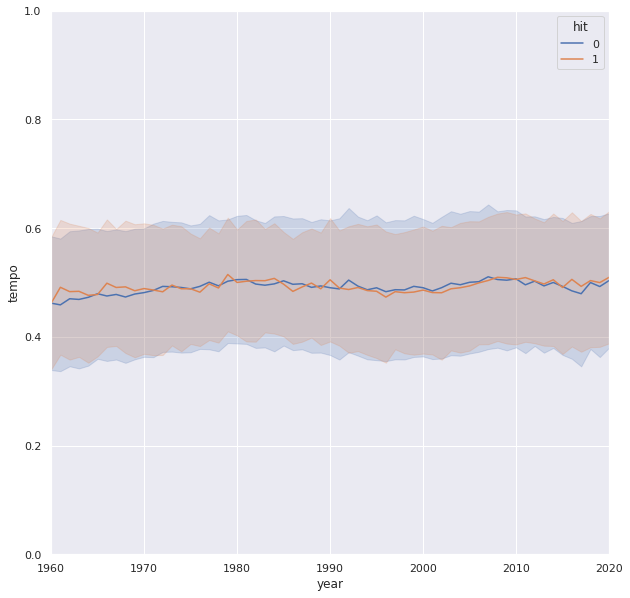

In [35]:
feature = 'tempo'

sns.set()
fig.suptitle('Audio Features evolution')
sns.set(rc={'figure.figsize':(10,10)})

x = df_hit.index.to_numpy()
y = df_hit[feature].to_numpy()

sns.lineplot(data=df, y=feature, x='year_YYYY', hue='hit', ci='sd')
plt.xlabel('year')
plt.ylim(0,1)
plt.xlim(1960,2020)